In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [14]:
import numpy as np
import pandas as pd

In [15]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [17]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
base=automap_base()

# reflect the tables
base.prepare(engine, reflect=True)

In [25]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [27]:
# Save references to each table
measurement=base.classes.measurement
station=base.classes.station

In [28]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

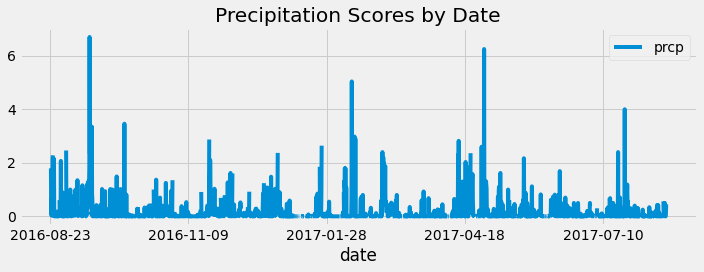

In [84]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_date=session.query(func.max(measurement.date)).all()[0][0]


# Calculate the date 1 year ago from the last data point in the database
# dt.date(2017,8,23)
one_yr=int(last_date[0:4])
one_mth=int(last_date[5:7])
one_day=int(last_date[8:])

last_year=dt.date(one_yr-1, one_mth, one_day)

# Perform a query to retrieve the data and precipitation scores
lastyear_prcp=session.query(measurement.date,measurement.prcp).filter(measurement.date>=last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(lastyear_prcp).set_index(['date'])

# Sort the dataframe by date
prcp_df=prcp_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(figsize=(10,4))
plt.title("Precipitation Scores by Date")
plt.xticks(rotation='horizontal')
plt.tight_layout()


In [62]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [65]:
# Design a query to show how many stations are available in this dataset?
#.all gives list; wrap to get length or num of stations
len(session.query(station.name).all())

9

In [72]:
# What are the most active stations? (i.e. what stations have the most rows)?
desc_stations=session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

# List the stations and the counts in descending order.
desc_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [85]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#'USC00519281':[(min, max,average)] below:
session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station=='USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

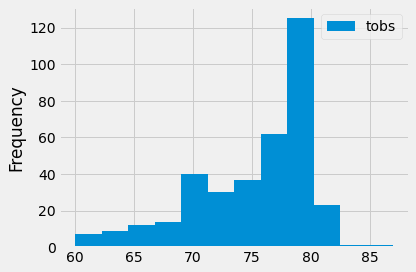

In [111]:
# Choose the station with the highest number of temperature observations.
session.query(measurement.station, func.max(measurement.tobs)).order_by(measurement.tobs).all()
# Query the last 12 months of temperature observation data for this station and 
station_lastyear_tobs=session.query(measurement.date,measurement.tobs).filter(measurement.date>=last_year).filter(measurement.station=='USC00519397').all()
station_lastyear_tobs

station_tobs_df=pd.DataFrame(station_lastyear_tobs).set_index(['date'])
station_tobs_df

# plot the results as a histogram
# bins=12

# dist_mean=session.query(func.avg(measurement.tobs)).filter(measurement.station=='USC00519397').all()
# dist_mean

station_tobs_df.plot.hist(bins=12)
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
